# Detecting Building defects using  VGG16

### Importing necessary libraries

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


### Image Data Agumentation¶

In [5]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#performing data agumentation on train data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#performing data agumentation on test data
test_datagen = ImageDataGenerator(rescale = 1./255)

### Loading our data and performing data agumentation

In [24]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'C:\Users\Harshni\OneDrive\Desktop\CrackDetection\dataset\train_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 316 images belonging to 3 classes.


In [25]:
test_set = test_datagen.flow_from_directory(r'C:\Users\Harshni\OneDrive\Desktop\CrackDetection\dataset\test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 3 classes.


In [26]:
print(training_set.class_indices)#checking the number of classes

{'crack': 0, 'flakes': 1, 'roof': 2}


In [27]:
from collections import Counter as c
c(training_set .labels)

Counter({0: 86, 1: 176, 2: 54})

## Model Building

In [30]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\Harshni\OneDrive\Desktop\CrackDetection\dataset\train_set'
valid_path = r'C:\Users\Harshni\OneDrive\Desktop\CrackDetection\dataset\test_set'


In [31]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [32]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [35]:
  # useful for getting number of output classes
folders = glob(r'C:\Users\Harshni\OneDrive\Desktop\CrackDetection\dataset\train_set\*')

In [36]:
folders

['C:\\Users\\Harshni\\OneDrive\\Desktop\\CrackDetection\\dataset\\train_set\\crack',
 'C:\\Users\\Harshni\\OneDrive\\Desktop\\CrackDetection\\dataset\\train_set\\flakes',
 'C:\\Users\\Harshni\\OneDrive\\Desktop\\CrackDetection\\dataset\\train_set\\roof']

In [39]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [40]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [41]:

# view the structure of the model
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

### Compiling the model

In [42]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


### Fit the model

In [43]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
10/10 [==============================] - 171s 17s/step - loss: 1.4118 - acc: 0.4684 - val_loss: 0.8984 - val_acc: 0.6000
Epoch 2/10
10/10 [==============================] - 181s 18s/step - loss: 0.6110 - acc: 0.7215 - val_loss: 0.8343 - val_acc: 0.6583
Epoch 3/10
10/10 [==============================] - 185s 19s/step - loss: 0.4416 - acc: 0.8196 - val_loss: 0.8907 - val_acc: 0.6583
Epoch 4/10
10/10 [==============================] - 190s 19s/step - loss: 0.3786 - acc: 0.8513 - val_loss: 0.6912 - val_acc: 0.7500
Epoch 5/10
10/10 [==============================] - 187s 19s/step - loss: 0.2592 - acc: 0.9051 - val_loss: 0.4818 - val_acc: 0.8083
Epoch 6/10
10/10 [==============================] - 190s 19s/step - loss: 0.1933 - acc: 0.9589 - val_loss: 0.7902 - val_acc: 0.7667
Epoch 7/10
10/10 [==============================] - 186s 19s/step - loss: 0.1903 - acc: 0.9430 - val_loss: 0.4860 - val_acc: 0.8083
Epoch 8/10
10/10 [==============================] - 174s 17s/step - loss: 0.

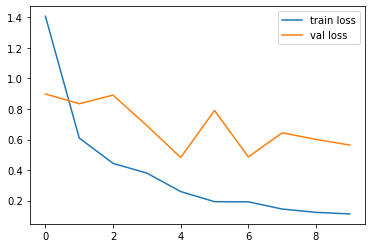

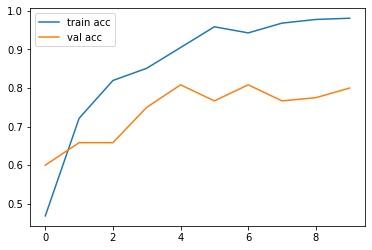

<Figure size 432x288 with 0 Axes>

In [48]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Saving our model

In [49]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_building_defects_vgg16.h5')

### Predicitng our results

In [50]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
model = load_model("model_building_defects_vgg16.h5") #loading the model for testing

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Using TensorFlow backend.


In [54]:
img=image.load_img(r'C:\Users\Harshni\OneDrive\Desktop\CrackDetection\dataset\train_set\crack\38.jpg',target_size=(224,224))
x=image.img_to_array(img)
#x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
#model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)


In [55]:
a

array([0], dtype=int64)

In [56]:
index=['crack','flakes','roof']
result=str(index[a[0]])
result

'crack'